Double Play Analytics

(1) Forecast the outcome of games; (2) understand the most important factors that influence the outcome of games.

- Most important factors of a win? 
    - Pitching (start), pitching (reliever/closer), defense, runs/hitting (consistent), homeruns, the park, OBP, other?
    - run consistency - can you get at least 3 runs per game x percent of the time?


In [1]:
# Bringing in packages for EDA, pre-processing, modeling, and visualizations
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, plot_confusion_matrix, recall_score

#### Create a single dataset

In [2]:
#Each year is saved in a separate .txt file
file_paths = ["data/gl2010.txt", "data/gl2011.txt", "data/gl2012.txt", "data/gl2013.txt", "data/gl2014.txt",
              "data/gl2015.txt", "data/gl2016.txt", "data/gl2017.txt", "data/gl2018.txt", "data/gl2019.txt",
              "data/gl2020.txt", "data/gl2021.txt", "data/gl2022.txt", "data/gl2023.txt"]

In [3]:
dfs=[]

In [4]:
for file_path in file_paths:
    with open(file_path, "r") as f:
        # Read lines from the file
        data = f.readlines()
        # Split each line by comma and create a list of lists
        data_split = [line.strip().split(",") for line in data]
        # Create DataFrame from the data
        df_initial = pd.DataFrame(data_split)
        # Append DataFrame to the list
        dfs.append(df_initial)

In [5]:
# Concatenate all DataFrames in the list
df = pd.concat(dfs, ignore_index=True)

#### Understand what the data look like

In [6]:

# Set the display width to accommodate more characters per row
pd.set_option('display.width', 1000)  # Adjust as needed

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the head of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32484 entries, 0 to 32483
Columns: 179 entries, 0 to 178
dtypes: object(179)
memory usage: 44.4+ MB


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
0,"""20100404""","""0""","""Sun""","""NYA""","""AL""",1,"""BOS""","""AL""",1,7,9,51,"""N""","""""","""""","""""","""BOS07""",37440,226,"""020300200""","""01001331x""",37,12,2,0,2,6,0,0,0,6,0,2,2,0,2,0,9,5,8,8,1,0,24,9,1,1,1,0,34,12,3,1,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0,"""westj901""","""Joe West""","""herna901""","""Angel Hernandez""","""schrp901""","""Paul Schrieber""","""drakr901""","""Rob Drake""","""""","""(none)""","""""","""(none)""","""giraj001""","""Joe Girardi""","""frant001""","""Terry Francona""","""okajh001""","""Hideki Okajima""","""parkc002""","""Chan Ho Park""","""papej001""","""Jonathan Papelbon""","""""","""(none)""","""sabac001""","""CC Sabathia""","""beckj002""","""Josh Beckett""","""jeted001""","""Derek Jeter""",6,"""johnn001""","""Nick Johnson""",10,"""teixm001""","""Mark Teixeira""",3,"""rodra001""","""Alex Rodriguez""",5,"""canor001""","""Robinson Cano""",4,"""posaj001""","""Jorge Posada""",2,"""granc001""","""Curtis Granderson""",8,"""swisn001""","""Nick Swisher""",9,"""gardb001""","""Brett Gardner""",7,"""ellsj001""","""Jacoby Ellsbury""",7,"""pedrd001""","""Dustin Pedroia""",4,"""martv001""","""Victor Martinez""",2,"""youkk001""","""Kevin Youkilis""",3,"""ortid001""","""David Ortiz""",10,"""belta001""","""Adrian Beltre""",5,"""drewj001""","""J.D. Drew""",9,"""camem001""","""Mike Cameron""",8,"""scutm001""","""Marco Scutaro""",6,"""""","""Y""",None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,"""20100405""","""0""","""Mon""","""MIN""","""AL""",1,"""ANA""","""AL""",1,3,6,51,"""N""","""""","""""","""""","""ANA01""",43504,180,"""020010000""","""21001002x""",32,7,1,0,1,3,0,1,1,3,0,8,1,0,1,0,7,4,6,6,1,0,24,4,0,0,0,0,33,9,0,0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0,"""mcclt901""","""Tim McClelland""","""everm901""","""Mike Everitt""","""fleta901""","""Andy Fletcher""","""johna901""","""Adrian Johnson""","""""","""(none)""","""""","""(none)""","""gardr001""","""Ron Gardenhire""","""sciom001""","""Mike Scioscia""","""weavj003""","""Jered Weaver""","""bakes002""","""Scott Baker""","""fuenb001""","""Brian Fuentes""","""matsh001""","""Hideki Matsui""","""bakes002""","""Scott Baker""","""weavj003""","""Jered Weaver""","""spand001""","""Denard Span""",8,"""hudso001""","""Orlando Hudson""",4,"""mauej001""","""Joe Mauer""",2,"""mornj001""","""Justin Morneau""",3,"""cuddm001""","""Michael Cuddyer""",9,"""kubej002""","""Jason Kubel""",10,"""yound003""","""Delmon Young""",7,"""hardj003""","""J.J. Hardy""",6,"""puntn001""","""Nick Punto""",5,"""aybae001""","""Erick Aybar""",6,"""abreb001""","""Bobby Abreu""",9,"""huntt001""","""Torii Hunter""",8,"""matsh001""","""Hideki Matsui""",10,"""morak001""","""Kendrys Morales""",3,"""rivej001""","""Juan Rivera""",7,"""kendh001""","""Howie Kendrick""",4,"""woodb003""","""Brandon Wood""",5,"""mathj001""","""Jeff Mathis""",2,"""""","""Y""",None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,"""20100405""","""0""","""Mon""","""CLE""","""AL""",1,"""CHA""","""AL""",1,0,6,51,"""D""","""""","""""","""""","""CHI12""",38935,144,"""000000000""","""20201001x""",30,4,0,0,0,0,0,0,0,1,0,7,0,0,1,0,4,4,6,6,4,0,24,14,0,0,1,0,28,6,2,0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0,"""darlg901""","""Gary Darling""","""hohnb901""","""Bill Hohn""","""drecb901""","""Bruce Dreckman""","""estam901""","""Mike Estab

In [8]:

df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
32479,"""20231001""","""0""","""Sun""","""SDN""","""NL""",162,"""CHA""","""AL""",162,2,1,66,"""D""","""""","""""","""""","""CHI12""",20588,187,"""00000000011""","""00000000010""",36,7,1,0,0,2,0,1,0,7,0,8,2,1,2,0,11,6,0,0,0,0,33,13,1,0,1,0,40,7,0,0,0,1,0,0,1,3,1,16,1,0,1,0,12,6,0,0,0,0,33,15,0,1,2,0,"""macka901""","""Alex MacKay""","""ballb901""","""Brock Ballou""","""hudsm901""","""Marvin Hudson""","""tumpj901""","""John Tumpane""","""""","""(none)""","""""","""(none)""","""melvb001""","""Bob Melvin""","""grifp801""","""Pedro Grifol""","""hillr001""","""Rich Hill""","""crond001""","""Declan Cronin""","""""","""(none)""","""profj001""","""Jurickson Profar""","""avilp001""","""Pedro Avila""","""urenj001""","""Jose Urena""","""bogax001""","""Xander Bogaerts""",6,"""kim-h002""","""Ha-Seong Kim""",4,"""sotoj001""","""Juan Soto""",10,"""tatif002""","""Fernando Tatis""",9,"""profj001""","""Jurickson Profar""",7,"""coopg002""","""Garrett Cooper""",3,"""grist001""","""Trent Grisham""",8,"""rosae002""","""Eguy Rosario""",5,"""sullb001""","""Brett Sullivan""",2,"""andre001""","""Elvis Andrus""",6,"""remiz001""","""Zach Remillard""",4,"""vauga001""","""Andrew Vaughn""",3,"""sheeg001""","""Gavin Sheets""",9,"""grany001""","""Yasmani Grandal""",10,"""sosal001""","""Lenyn Sosa""",5,"""naqut001""","""Tyler Naquin""",7,"""thomt002""","""Trayce Thompson""",8,"""perec005""","""Carlos Perez""",2,"""""","""Y""",None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32480,"""20231001""","""0""","""Sun""","""CLE""","""AL""",162,"""DET""","""AL""",162,2,5,51,"""D""","""""","""""","""""","""DET05""",41425,148,"""000110000""","""11102000x""",33,5,1,0,1,2,0,0,0,1,0,8,1,0,0,0,5,4,5,5,0,0,24,7,1,0,1,0,32,9,4,0,1,5,0,0,0,6,0,7,1,0,1,0,9,3,1,1,1,0,27,7,1,0,0,0,"""bacoj901""","""John Bacon""","""hoyej901""","""James Hoye""","""libkj901""","""John Libka""","""herna901""","""Angel Hernandez""","""""","""(none)""","""""","""(none)""","""frant001""","""Terry Francona""","""hinca001""","""A.J. Hinch""","""rodre004""","""Eduardo Rodriguez""","""gioll001""","""Lucas Giolito""","""langa001""","""Alex Lange""","""carpk001""","""Kerry Carpenter""","""gioll001""","""Lucas Giolito""","""rodre004""","""Eduardo Rodriguez""","""kwans001""","""Steven Kwan""",7,"""ramij003""","""Jose Ramirez""",10,"""naylj001""","""Josh Naylor""",3,"""laurr001""","""Ramon Laureano""",8,"""gonzo001""","""Oscar Gonzalez""",9,"""roccb001""","""Brayan Rocchio""",6,"""naylb001""","""Bo Naylor""",2,"""freet001""","""Tyler Freeman""",5,"""tenaj001""","""Jose Tena""",4,"""meadp001""","""Parker Meadows""",8,"""torks001""","""Spencer Torkelson""",3,"""cabrm001""","""Miguel Cabrera""",10,"""carpk001""","""Kerry Carpenter""",9,"""vierm001""","""Matt Vierling""",5,"""ibana001""","""Andy Ibanez""",4,"""badda001""","""Akil Baddoo""",7,"""baezj001""","""Javier Baez""",6,"""rogej004""","""Jake Rogers""",2,"""""","""Y""",None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32481,"""20231001""","""0""","""Sun""","""NYA""","""AL""",162,"""KCA""","""AL""",162,2,5,51,"""D""","""""","""""","""""","""KAN06""",20662,144,"""000002000""","""02021000x""",32,7,3,0,0,2,0,0,0,3,0,7,0,0,2,0,6,3,5,5,0,0,24,12,1,0,0,0,32,11,0,1,3,5,1,1,0,1,0,8,2,1,0,0,6,4,2,2,0,0,27,14,0,0,2,0,"""vondc901""","""Clint Vondrak""","""torrc901""","""Carlos Torres""","""kulpr901""","""Ron Kulpa""

In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
count,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,218,218,218,192,171,171,67,61,60,17,14,14,10,9,9,9,1,1
unique,2417,3,7,31,2,163,31,2,163,27,26,64,2,38,15,11,52,21656,271,11485,12503,91,63,47,44,24,26,5,5,7,18,5,27,10,8,7,14,25,14,24,24,15,8,54,26,7,5,18,14,58,28,12,6,25,25,6,5,7,16,7,26,10,8,7,15,25,14,26,26,14,10,33,29,8,5,13,16,150,149,152,148,149,149,146,146,35,35,37,37,120,120,122,122,2008,2004,2124,2121,960,962,1767,1761,1264,1264,1265,1263,843,842,46,1107,1104,45,785,811,43,809,832,43,1208,1234,45,1510,1535,46,1658,1682,47,1839,1860,46,2167,2189,48,797,824,47,1046,1069,42,759,788,46,805,829,43,1188,1212,43,1468,1490,44,1653,1678,47,1777,1801,48,1813,1838,48,12,51,43,106,18,14,54,28,14,19,14,9,6,10,7,2,9,2,1,1
top,"""20200904""","""0""","""Sat""","""TOR""","""NL""",36,"""PHI""","""NL""",19,3,3,51,"""N""","""""","""""","""""","""SFO03""",,175,"""000000000""","""000000000""",33,8,1,0,0,3,0,0,0,2,0,8,0,0,0,0,6,4,2,2,0,0,24,9,0,0,0,0,32,8,1,0,0,3,0,0,0,2,0,7,0,0,0,0,6,4,2,2,0,0,27,10,0,0,0,0,"""millb901""","""Bill Miller""","""marqa901""","""Marvin Hudson""","""carlm901""","""Mark Carlson""","""nelsj901""","""Jeff Nelson""","""""","""(none)""","""""","""(none)""","""melvb001""","""Bob Melvin""","""melvb001""","""Bob Melvin""","""schem001""","""Max Scherzer""","""bumgm001""","""Madison Bumgarner""","""""","""(none)""","""""","""(none)""","""schem001""","""Max Scherzer""","""greiz001""","""Zack Greinke""","""bettm001""","""Mookie Betts""",8,"""troum001""","""Mike Trout""",4,"""vottj001""","""Joey Votto""",3,"""belta001""","""Adrian Beltre""",3,"""moliy001""","""Yadier Molina""",3,"""moliy001""","""Yadier Molina""",5,"""crawb001""","""Brandon Crawford""",2,"""arcio002""","""Orlando Arcia""",2,"""maldm001""","""Martin Maldonado""",1,"""bettm001""","""Mookie Betts""",8,"""troum001""","""Mike Trout""",4,"""vottj001""","""Joey Votto""",3,"""belta001""","""Adrian Beltre""",3,"""seagk001""","""Kyle Seager""",3,"""moliy001""","""Yadier Molina""",5,"""ahmen001""","""Nick Ahmed""",2,"""mercj002""","""Jordy Mercer""",2,"""maldm001""","""Martin Maldonado""",1,"""""","""Y""",umphome,1,"""Y""",ump2b,"(None)""","""Y""",ump2b,"(None)""","""Y""","""Y""",ump2b,"""Y""",6,ump3b,"herna901""","""Y""","(None)""","""Y"""
freq,20,31518,5352,1091,16479,222,1088,16491,225,4625,4547,14655,21409,32446,32446,32435,1087,897,593,2156,1827,3608,3741,9906,27918,11700,4704,26484,25507,22817,6605,27665,4370,20218,26184,14920,32162,4944,9890,4737,4751,23069,31473

In [10]:
df.shape

(32484, 179)

In [11]:
nan_values = df.isna().any()
nan_values

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [12]:
df.dtypes

0      object
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
32     object
33     object
34     object
35     object
36     object
37     object
38     object
39     object
40     object
41     object
42     object
43     object
44     object
45     object
46     object
47     object
48     object
49     object
50     object
51     object
52     object
53     object
54     object
55     object
56     object
57     object
58     object
59     object
60     object
61     object
62     object
63     object
64     object
65     object
66     object
67     object
68     object
69     object
70     object
71    

In [13]:
df.count()

0      32484
1      32484
2      32484
3      32484
4      32484
5      32484
6      32484
7      32484
8      32484
9      32484
10     32484
11     32484
12     32484
13     32484
14     32484
15     32484
16     32484
17     32484
18     32484
19     32484
20     32484
21     32484
22     32484
23     32484
24     32484
25     32484
26     32484
27     32484
28     32484
29     32484
30     32484
31     32484
32     32484
33     32484
34     32484
35     32484
36     32484
37     32484
38     32484
39     32484
40     32484
41     32484
42     32484
43     32484
44     32484
45     32484
46     32484
47     32484
48     32484
49     32484
50     32484
51     32484
52     32484
53     32484
54     32484
55     32484
56     32484
57     32484
58     32484
59     32484
60     32484
61     32484
62     32484
63     32484
64     32484
65     32484
66     32484
67     32484
68     32484
69     32484
70     32484
71     32484
72     32484
73     32484
74     32484
75     32484
76     32484

#### Preparing data for more EDA (easier to use with names)

In [14]:
# Dropping the columns with minimalinformation at the END of the dataset and individual player, manager, and umpire info
# Additional dropping needed--> 
df.drop(columns=df.columns[77:179], inplace=True)

In [15]:
# Renaming the columns to something more descriptive
new_column_names = {
    0: 'date',
    1: 'num_games',
    2: 'day_of_week',
    3: 'team_visiting',
    4: 'league_visiting',
    5: 'game_num_visiting',
    6: 'team_home',
    7: 'league_home',
    8: 'game_num_home',
    9: 'score_visiting',
    10: 'score_home',
    11: 'outs_in_game',
    12: 'time_of_day',
    13: 'game_completed',
    14: 'forfeit',
    15: 'protest',
    16: 'park_id',
    17: 'attendance',
    18: 'length_min',
    19: 'line_score_visiting',
    20: 'line_score_home',   
    
    # Offense - Visiting
    21: 'at_bats_visiting',
    22: 'hits_visiting',
    23: 'double_visiting',
    24: 'triple_visiting',
    25: 'home_run_visiting',
    26: 'rbi_visiting',
    27: 'sacrifice_hit_visiting',
    28: 'sacrifine_fly_visiting',
    29: 'hit_by_pitch_visiting',
    30: 'walk_visiting',
    31: 'intent_walk_visiting',
    32: 'strikeout_visiting',
    33: 'stolen_base_visiting',
    34: 'caught_stealing_visiting',
    35: 'grounded_into_double_plays_visiting',
    36: 'first_catcher_interfere_visiting',
    37: 'left_on_base_visiting',
    
    # Pitching - Visiting
    38: 'pitchers_used_visiting',
    39: 'individual_earned_runs_visiting',
    40: 'team_earned_runs_visiting',
    41: 'wild_pitches_visiting',
    42: 'balks_visiting',
    
    # Defense - Visiting
    43: 'putouts_visiting',   
    44: 'assists_visiting',
    45: 'errors_visiting',
    46: 'passed_balls_visiting',
    47: 'double_def_visiting',
    48: 'triple_def_visiting',   
    
    # Offense - Home
    49: 'at_bats_home',
    50: 'hits_home',
    51: 'double_home',
    52: 'triple_home',
    53: 'home_run_home',
    54: 'rbi_home',
    55: 'sacrifice_hit_home',
    56: 'sacrifine_fly_home',
    57: 'hit_by_pitch_home',
    58: 'walk_home',
    59: 'intent_walk_home',
    60: 'strikeout_home',
    61: 'stolen_base_home',
    62: 'caught_stealing_home',
    63: 'grounded_into_double_plays_home',
    64: 'first_catcher_interfere_home',
    65: 'left_on_base_home',
    
    # Pitching - Home
    66: 'pitchers_used_home',
    67: 'individual_earned_runs_home',
    68: 'team_earned_runs_home',
    69: 'wild_pitches_home',
    70: 'balks_home',
    
    # Defense - Home
    71: 'putouts_home',
    72: 'assists_home',
    73: 'errors_home',
    74: 'passed_balls_home',
    75: 'double_def_home',
    76: 'triple_def_home',    
}

# Rename columns
df.rename(columns=new_column_names, inplace=True)

In [16]:
# Converting most numeric columns from strings to integers
columns_to_convert = [
    "num_games", 
    "game_num_visiting", 
    "game_num_home", 
    "score_visiting", 
    'game_num_home', 
    'score_visiting',    
    'score_home', 
    "outs_in_game", 
    "attendance", 
    "length_min", 
    "at_bats_visiting",                      
    "hits_visiting", 
    "double_visiting", 
    "triple_visiting", 
    "home_run_visiting", 
    "rbi_visiting", 
    "sacrifice_hit_visiting",  
    'sacrifine_fly_visiting',
    'hit_by_pitch_visiting',
    'walk_visiting',
    'intent_walk_visiting',
    'strikeout_visiting',
    'stolen_base_visiting',
    'caught_stealing_visiting',
    'grounded_into_double_plays_visiting',
    'first_catcher_interfere_visiting',
    'left_on_base_visiting',
    'pitchers_used_visiting',
    'individual_earned_runs_visiting',
    'team_earned_runs_visiting',
    'wild_pitches_visiting',
    'balks_visiting',
    'putouts_visiting',   
    'assists_visiting',
    'errors_visiting',
    'passed_balls_visiting',
    'double_def_visiting',
    'triple_def_visiting',       
    'at_bats_home',
    'hits_home',
    'double_home',
    'triple_home',
    'home_run_home',
    'rbi_home',
    'sacrifice_hit_home',
    'sacrifine_fly_home',
    'hit_by_pitch_home',
    'walk_home',
    'intent_walk_home',
    'strikeout_home',
    'stolen_base_home',
    'caught_stealing_home',
    'grounded_into_double_plays_home',
    'first_catcher_interfere_home',
    'left_on_base_home',
    'pitchers_used_home',
    'individual_earned_runs_home',
    'team_earned_runs_home',
    'wild_pitches_home',
    'balks_home',
    'putouts_home',
    'assists_home',
    'errors_home',
    'passed_balls_home',
    'double_def_home',
    'triple_def_home']

# Player positions are numeric, but are being left as strings

In [17]:
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [18]:
# Removing quotations around strings--
columns_to_convert_strings = [
  'date',
  'num_games',
  'day_of_week',
  'team_visiting',
  'league_visiting',
  'team_home',
  'league_home',   
  'time_of_day',
  'park_id',    
  'line_score_visiting',
  'line_score_home'] 

In [19]:
df[columns_to_convert_strings] = df[columns_to_convert_strings].applymap(lambda x: x.strip('""') if isinstance(x, str) else x)

In [20]:
df.head()

,date,num_games,day_of_week,team_visiting,league_visiting,game_num_visiting,team_home,league_home,game_num_home,score_visiting,score_home,outs_in_game,time_of_day,game_completed,forfeit,protest,park_id,attendance,length_min,line_score_visiting,line_score_home,at_bats_visiting,hits_visiting,double_visiting,triple_visiting,home_run_visiting,rbi_visiting,sacrifice_hit_visiting,sacrifine_fly_visiting,hit_by_pitch_visiting,walk_visiting,intent_walk_visiting,strikeout_visiting,stolen_base_visiting,caught_stealing_visiting,grounded_into_double_plays_visiting,first_catcher_interfere_visiting,left_on_base_visiting,pitchers_used_visiting,individual_earned_runs_visiting,team_earned_runs_visiting,wild_pitches_visiting,balks_visiting,putouts_visiting,assists_visiting,errors_visiting,passed_balls_visiting,double_def_visiting,triple_def_visiting,at_bats_home,hits_home,double_home,triple_home,home_run_home,rbi_home,sacrifice_hit_home,sacrifine_fly_home,hit_by_pitch_home,walk_home,intent_walk_home,strikeout_home,stolen_base_home,caught_stealing_home,grounded_into_double_plays_home,first_catcher_interfere_home,left_on_base_home,pitchers_used_home,individual_earned_runs_home,team_earned_runs_home,wild_pitches_home,balks_home,putouts_home,assists_home,errors_home,passed_balls_home,double_def_home,triple_def_home
0,20100404,NaN,Sun,NYA,AL,1,BOS,AL,1,7,9,51,N,"""""","""""","""""",BOS07,37440.0,226.0,020300200,01001331x,37.0,12,2.0,0.0,2,6,0,0,0,6,0,2,2,0,2,0,9,5,8,8,1,0,24,9,1,1,1,0,34,12,3,1,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0
1,20100405,NaN,Mon,MIN,AL,1,ANA,AL,1,3,6,51,N,"""""","""""","""""",ANA01,43504.0,180.0,020010000,21001002x,32.0,7,1.0,0.0,1,3,0,1,1,3,0,8,1,0,1,0,7,4,6,6,1,0,24,4,0,0,0,0,33,9,0,0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0
2,20100405,NaN,Mon,CLE,AL,1,CHA,AL,1,0,6,51,D,"""""","""""","""""",CHI12,38935.0,144.0,000000000,20201001x,30.0,4,0.0,0.0,0,0,0,0,0,1,0,7,0,0,1,0,4,4,6,6,4,0,24,14,0,0,1,0,28,6,2,0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0
3,20100405,NaN,Mon,DET,AL,1,KCA,AL,1,8,4,54,D,"""""","""""","""""",KAN06,40052.0,185.0,100001600,020020000,39.0,12,4.0,0.0,0,7,0,0,0,2,0,9,0,0,1,0,6,5,4,4,0,0,27,12,1,0,0,0,35,9,0,0,1,4,1,0,0,2,0,8,2,0,0,0,7,6,7,7,0,0,27,9,1,0,1,0
4,20100405,NaN,Mon,SEA,AL,1,OAK,AL,1,5,3,54,N,"""""","""""","""""",OAK01,30686.0,167.0,111000002,000001200,31.0,6,2.0,0.0,1,5,0,1,0,8,1,8,3,2,1,0,8,4,3,3,1,0,27,18,1,0,4,0,28,5,0,0,0,3,0,0,0,7,0,6,1,0,4,0,5,5,2,2,1,0,27,9,4,0,1,0


In [21]:
df.describe()

,num_games,game_num_visiting,game_num_home,score_visiting,score_home,outs_in_game,attendance,length_min,at_bats_visiting,hits_visiting,double_visiting,triple_visiting,home_run_visiting,rbi_visiting,sacrifice_hit_visiting,sacrifine_fly_visiting,hit_by_pitch_visiting,walk_visiting,intent_walk_visiting,strikeout_visiting,stolen_base_visiting,caught_stealing_visiting,grounded_into_double_plays_visiting,first_catcher_interfere_visiting,left_on_base_visiting,pitchers_used_visiting,individual_earned_runs_visiting,team_earned_runs_visiting,wild_pitches_visiting,balks_visiting,putouts_visiting,assists_visiting,errors_visiting,passed_balls_visiting,double_def_visiting,triple_def_visiting,at_bats_home,hits_home,double_home,triple_home,home_run_home,rbi_home,sacrifice_hit_home,sacrifine_fly_home,hit_by_pitch_home,walk_home,intent_walk_home,strikeout_home,stolen_base_home,caught_stealing_home,grounded_into_double_plays_home,first_catcher_interfere_home,left_on_base_home,pitchers_used_home,individual_earned_runs_home,team_earned_runs_home,wild_pitches_home,balks_home,putouts_home,assists_home,errors_home,passed_balls_home,double_def_home,triple_def_home
count,0.0,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,31549.000000,32446.000000,32479.000000,32484.000000,32446.000000,32446.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000
mean,NaN,80.078654,80.078408,4.356976,4.472663,53.434121,28737.320866,182.644794,62.743373,8.815140,1.703631,0.154749,1.137606,4.161526,0.213551,0.245752,0.367750,3.075514,0.173624,8.324960,0.564493,0.215891,0.754402,0.019579,6.847217,4.049163,4.123476,4.115688,0.368428,0.037311,25.940186,9.223218,0.580624,0.066063,0.873107,0.012221,33.119012,8.468231,1.682767,0.178272,1.135975,4.269887,0.217030,0.255264,0.365965,3.183413,0.192618,7.672762,0.553072,0.192710,0.716168,0.019917,6.769425,4.241627,4.012929,4.005356,0.356237,0.038604,27.436523,9.738517,0.577515,0.068618,0.910417,0.012498
std,NaN,46.946529,46.954208,3.157740,3.080320,4.870765,11018.866569,27.928348,945.516280,7.389238,1.376263,0.405844,1.649328,3.071737,0.481265,0.503877,0.630936,2.017775,0.448319,2.991783,0.884520,0.471943,0.842280,0.335924,2.644702,1.383318,2.953079,2.948559,0.687710,0.258511,2.895308,3.117591,0.791075,0.264367,1.275963,0.351185,4.227615,3.335808,1.362051,0.433228,1.591665,2.998973,0.483828,0.508141,0.622847,2.021018,0.478127,2.967896,0.869984,0.452858,0.828135,0.327599,2.625204,1.378145,3.007715,3.004256,0.678946,0.258679,2.408694,3.184150,0.795421,0.269660,1.308227,0.356093
min,NaN,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,75.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,39.000000,39.000000,2.000000,2.000000,51.000000,20244.000000,164.000000,32.000000,6.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,2.000000,2.000000,0

In [22]:
df.count()

date                                   32484
num_games                                  0
day_of_week                            32484
team_visiting                          32484
league_visiting                        32484
game_num_visiting                      32484
team_home                              32484
league_home                            32484
game_num_home                          32484
score_visiting                         32484
score_home                             32484
outs_in_game                           32484
time_of_day                            32484
game_completed                         32484
forfeit                                32484
protest                                32484
park_id                                32484
attendance                             31549
length_min                             32446
line_score_visiting                    32484
line_score_home                        32484
at_bats_visiting                       32479
hits_visit

In [23]:
df.dtypes

date                                    object
num_games                              float64
day_of_week                             object
team_visiting                           object
league_visiting                         object
game_num_visiting                        int64
team_home                               object
league_home                             object
game_num_home                            int64
score_visiting                           int64
score_home                               int64
outs_in_game                             int64
time_of_day                             object
game_completed                          object
forfeit                                 object
protest                                 object
park_id                                 object
attendance                             float64
length_min                             float64
line_score_visiting                     object
line_score_home                         object
at_bats_visit

##### Columns with missing data- 
I think it's likely I won't be using attendance or length_min- will likely drop full columns
For the other three I will likely drop the rows, not a noteable number of missings, no reason to believe there is anything systematic about these missings, but I'll look to confirm, e.g., same season, same team, etc.

Initial total rows = 32484 

Dropped column
- attendance                             31549
- length_min                             32446
- protest
- misc

Dropped rows
- year = 2020; removed this, but not so sure. If I'm not analyzing by year it feels weird to remove it.
- at_bats_visiting                       32479
- double_visiting                        32446
- triple_visiting                        32446


##### Fields with large 'missing' /NA - how to handle these missing? 
 - saving_pitcher_id
 - saving_pitcher_name
 - game_winning_rbi_id
 - game_winning_rbi_name
 


In [24]:
# Dropping rows with missing values in the listed columns
df.dropna(subset=["at_bats_visiting", "double_visiting", "triple_visiting"], inplace=True)

In [25]:
# Drop row where game ended in a tie; found this obs because when calculated run differential there was one obs with a 0 differential
df.drop(index=16957, inplace=True)

In [26]:
# Drop rows where there was a protest
df.dropna(subset=['protest'], inplace=True)
df = df[(df['protest'] != '"V"') & (df['protest'] != '"H"')]

In [27]:
# This drops the partial 2020 season; not sure I want to drop it. It was an odd year, 
# but unless I'm looking at year as a factor what is the impact of keeping it in?
# df = df[df['year'] != 2020]

In [28]:
df.drop(columns=["attendance", "num_games", "length_min", "game_completed", "forfeit", "protest", "day_of_week", "league_visiting", "league_home", "park_id", "time_of_day", "game_num_visiting", "game_num_home", "line_score_visiting", "line_score_home"], inplace=True)
# both game_completed and forfeit had zero values/100% null for this timeframe

In [29]:
# FLO/MIA is the only team that switched three letter codes during this time period. Combining them as MIA
df['team_visiting'].replace({"FLO": "MIA"}, inplace=True)
df['team_home'].replace({"FLO": "MIA"}, inplace=True)

In [30]:
df.head()

,date,team_visiting,team_home,score_visiting,score_home,outs_in_game,at_bats_visiting,hits_visiting,double_visiting,triple_visiting,home_run_visiting,rbi_visiting,sacrifice_hit_visiting,sacrifine_fly_visiting,hit_by_pitch_visiting,walk_visiting,intent_walk_visiting,strikeout_visiting,stolen_base_visiting,caught_stealing_visiting,grounded_into_double_plays_visiting,first_catcher_interfere_visiting,left_on_base_visiting,pitchers_used_visiting,individual_earned_runs_visiting,team_earned_runs_visiting,wild_pitches_visiting,balks_visiting,putouts_visiting,assists_visiting,errors_visiting,passed_balls_visiting,double_def_visiting,triple_def_visiting,at_bats_home,hits_home,double_home,triple_home,home_run_home,rbi_home,sacrifice_hit_home,sacrifine_fly_home,hit_by_pitch_home,walk_home,intent_walk_home,strikeout_home,stolen_base_home,caught_stealing_home,grounded_into_double_plays_home,first_catcher_interfere_home,left_on_base_home,pitchers_used_home,individual_earned_runs_home,team_earned_runs_home,wild_pitches_home,balks_home,putouts_home,assists_home,errors_home,passed_balls_home,double_def_home,triple_def_home
0,20100404,NYA,BOS,7,9,51,37.0,12,2.0,0.0,2,6,0,0,0,6,0,2,2,0,2,0,9,5,8,8,1,0,24,9,1,1,1,0,34,12,3,1,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0
1,20100405,MIN,ANA,3,6,51,32.0,7,1.0,0.0,1,3,0,1,1,3,0,8,1,0,1,0,7,4,6,6,1,0,24,4,0,0,0,0,33,9,0,0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0
2,20100405,CLE,CHA,0,6,51,30.0,4,0.0,0.0,0,0,0,0,0,1,0,7,0,0,1,0,4,4,6,6,4,0,24,14,0,0,1,0,28,6,2,0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0
3,20100405,DET,KCA,8,4,54,39.0,12,4.0,0.0,0,7,0,0,0,2,0,9,0,0,1,0,6,5,4,4,0,0,27,12,1,0,0,0,35,9,0,0,1,4,1,0,0,2,0,8,2,0,0,0,7,6,7,7,0,0,27,9,1,0,1,0
4,20100405,SEA,OAK,5,3,54,31.0,6,2.0,0.0,1,5,0,1,0,8,1,8,3,2,1,0,8,4,3,3,1,0,27,18,1,0,4,0,28,5,0,0,0,3,0,0,0,7,0,6,1,0,4,0,5,5,2,2,1,0,27,9,4,0,1,0


#### Create new features

In [31]:
# Creating an integer four-digit year feature

# Extract the first four characters
year_digits = df['date'].str[0:4]

# Convert the extracted substring to numeric
df['year'] = pd.to_numeric(year_digits)

df['year'] = df['year'].astype(int)


In [32]:
# Revert this back to if else, don't need elif since dropping tie game
# Creating a feature for the LOSING team for each game/row
def compare_and_get_value(row):
    if row['score_visiting'] < row['score_home']:
        return row['team_visiting']
    elif row ['score_home'] < row['score_visiting']:
        return row['team_home']
    else:
        return 'tie_game'

# Create a new feature based on the comparison
df['losing_team'] = df.apply(compare_and_get_value, axis=1)

# There is one game that ended in a tie, CNC and PIT Sept 29, 2016 

In [33]:
# Revert this back to if else, don't need elif since dropping tie game
# Creating a feature for the WINNING team for each game/row
def compare_and_get_value(row):
    if row['score_visiting'] > row['score_home']:
        return row['team_visiting']
    elif row ['score_home'] > row['score_visiting']:
        return row['team_home']
    else:
        return 'tie_game'

# Create a new feature based on the comparison
df['winning_team'] = df.apply(compare_and_get_value, axis=1)

# There is one game that ended in a tie, CNC and PIT Sept 29, 2016 

In [34]:
df['winning_team'].value_counts()

LAN    1277
NYA    1226
TBA    1183
SLN    1182
ATL    1170
BOS    1142
CLE    1136
MIL    1126
SFN    1115
HOU    1106
TOR    1097
WAS    1090
TEX    1083
CHN    1077
PHI    1073
ANA    1070
OAK    1070
NYN    1068
SEA    1052
MIN    1039
CIN    1031
ARI    1027
DET    1025
SDN    1023
BAL    1015
CHA    1009
PIT    1008
COL     979
KCA     978
MIA     957
Name: winning_team, dtype: int64

In [35]:
def calculate_run_differential(row):
    if row['winning_team'] == row['team_home']:
        return row['score_home'] - row['score_visiting']
    else:
        return row['score_visiting'] - row['score_home']

# Apply the function to create a new column 'goal_difference'
df['run_differential'] = df.apply(calculate_run_differential, axis=1)

In [36]:
df['run_differential'].value_counts()

1     9308
2     5916
3     4622
4     3817
5     2695
6     1974
7     1356
8      919
9      647
10     432
11     269
12     162
13     139
14      72
15      40
16      28
17      14
18       9
19       5
20       4
21       4
23       1
24       1
Name: run_differential, dtype: int64

In [37]:
# Total Runs per Game
df['total_runs'] = df['score_home'] + df['score_visiting']
df['total_runs'].value_counts()


7     3551
9     3347
5     3175
8     2555
11    2389
6     2379
10    2133
3     2065
4     1655
13    1650
12    1554
15    1068
14    1060
2      662
1      628
17     608
16     606
18     353
19     289
20     200
21     174
22      94
23      87
25      47
24      47
26      19
27       9
28       9
29       9
30       4
32       3
31       3
38       1
33       1
Name: total_runs, dtype: int64

In [38]:
# I think I can delete this and use the strikeout feature in the combo_df instead
# Combine 'team_home' and 'team_visiting' columns into a single column
# df['strikeouts'] = df['strikeout_home'] + df['strikeout_visiting']

# df['strikeouts'].value_counts()

In [39]:
df.head()

,date,team_visiting,team_home,score_visiting,score_home,outs_in_game,at_bats_visiting,hits_visiting,double_visiting,triple_visiting,home_run_visiting,rbi_visiting,sacrifice_hit_visiting,sacrifine_fly_visiting,hit_by_pitch_visiting,walk_visiting,intent_walk_visiting,strikeout_visiting,stolen_base_visiting,caught_stealing_visiting,grounded_into_double_plays_visiting,first_catcher_interfere_visiting,left_on_base_visiting,pitchers_used_visiting,individual_earned_runs_visiting,team_earned_runs_visiting,wild_pitches_visiting,balks_visiting,putouts_visiting,assists_visiting,errors_visiting,passed_balls_visiting,double_def_visiting,triple_def_visiting,at_bats_home,hits_home,double_home,triple_home,home_run_home,rbi_home,sacrifice_hit_home,sacrifine_fly_home,hit_by_pitch_home,walk_home,intent_walk_home,strikeout_home,stolen_base_home,caught_stealing_home,grounded_into_double_plays_home,first_catcher_interfere_home,left_on_base_home,pitchers_used_home,individual_earned_runs_home,team_earned_runs_home,wild_pitches_home,balks_home,putouts_home,assists_home,errors_home,passed_balls_home,double_def_home,triple_def_home,year,losing_team,winning_team,run_differential,total_runs
0,20100404,NYA,BOS,7,9,51,37.0,12,2.0,0.0,2,6,0,0,0,6,0,2,2,0,2,0,9,5,8,8,1,0,24,9,1,1,1,0,34,12,3,1,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0,2010,NYA,BOS,2,16
1,20100405,MIN,ANA,3,6,51,32.0,7,1.0,0.0,1,3,0,1,1,3,0,8,1,0,1,0,7,4,6,6,1,0,24,4,0,0,0,0,33,9,0,0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0,2010,MIN,ANA,3,9
2,20100405,CLE,CHA,0,6,51,30.0,4,0.0,0.0,0,0,0,0,0,1,0,7,0,0,1,0,4,4,6,6,4,0,24,14,0,0,1,0,28,6,2,0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0,2010,CLE,CHA,6,6
3,20100405,DET,KCA,8,4,54,39.0,12,4.0,0.0,0,7,0,0,0,2,0,9,0,0,1,0,6,5,4,4,0,0,27,12,1,0,0,0,35,9,0,0,1,4,1,0,0,2,0,8,2,0,0,0,7,6,7,7,0,0,27,9,1,0,1,0,2010,KCA,DET,4,12
4,20100405,SEA,OAK,5,3,54,31.0,6,2.0,0.0,1,5,0,1,0,8,1,8,3,2,1,0,8,4,3,3,1,0,27,18,1,0,4,0,28,5,0,0,0,3,0,0,0,7,0,6,1,0,4,0,5,5,2,2,1,0,27,9,4,0,1,0,2010,OAK,SEA,2,8


In [40]:
df.tail()

,date,team_visiting,team_home,score_visiting,score_home,outs_in_game,at_bats_visiting,hits_visiting,double_visiting,triple_visiting,home_run_visiting,rbi_visiting,sacrifice_hit_visiting,sacrifine_fly_visiting,hit_by_pitch_visiting,walk_visiting,intent_walk_visiting,strikeout_visiting,stolen_base_visiting,caught_stealing_visiting,grounded_into_double_plays_visiting,first_catcher_interfere_visiting,left_on_base_visiting,pitchers_used_visiting,individual_earned_runs_visiting,team_earned_runs_visiting,wild_pitches_visiting,balks_visiting,putouts_visiting,assists_visiting,errors_visiting,passed_balls_visiting,double_def_visiting,triple_def_visiting,at_bats_home,hits_home,double_home,triple_home,home_run_home,rbi_home,sacrifice_hit_home,sacrifine_fly_home,hit_by_pitch_home,walk_home,intent_walk_home,strikeout_home,stolen_base_home,caught_stealing_home,grounded_into_double_plays_home,first_catcher_interfere_home,left_on_base_home,pitchers_used_home,individual_earned_runs_home,team_earned_runs_home,wild_pitches_home,balks_home,putouts_home,assists_home,errors_home,passed_balls_home,double_def_home,triple_def_home,year,losing_team,winning_team,run_differential,total_runs
32479,20231001,SDN,CHA,2,1,66,36.0,7,1.0,0.0,0,2,0,1,0,7,0,8,2,1,2,0,11,6,0,0,0,0,33,13,1,0,1,0,40,7,0,0,0,1,0,0,1,3,1,16,1,0,1,0,12,6,0,0,0,0,33,15,0,1,2,0,2023,CHA,SDN,1,3
32480,20231001,CLE,DET,2,5,51,33.0,5,1.0,0.0,1,2,0,0,0,1,0,8,1,0,0,0,5,4,5,5,0,0,24,7,1,0,1,0,32,9,4,0,1,5,0,0,0,6,0,7,1,0,1,0,9,3,1,1,1,0,27,7,1,0,0,0,2023,CLE,DET,3,7
32481,20231001,NYA,KCA,2,5,51,32.0,7,3.0,0.0,0,2,0,0,0,3,0,7,0,0,2,0,6,3,5,5,0,0,24,12,1,0,0,0,32,11,0,1,3,5,1,1,0,1,0,8,2,1,0,0,6,4,2,2,0,0,27,14,0,0,2,0,2023,NYA,KCA,3,7
32482,20231001,TEX,SEA,0,1,51,30.0,4,1.0,0.0,0,0,0,0,0,0,0,11,0,0,1,0,3,3,1,1,0,0,24,4,0,0,0,0,28,4,0,0,0,1,0,0,1,1,0,10,0,0,0,0,5,4,0,0,0,0,27,9,0,0,1,0,2023,TEX,SEA,1,1
32483,20231001,TBA,TOR,12,8,54,43.0,16,4.0,0.0,3,11,0,0,1,3,0,9,2,0,0,0,8,4,6,6,1,0,27,7,2,0,0,0,40,12,2,2,1,6,0,0,2,3,0,7,0,0,0,0,10,6,12,12,2,0,27,8,0,0,0,0,2023,TOR,TBA,4,20


In [41]:
# Add unique numeric IDs
df['ID'] = range(1, len(df) + 1)
df['ID'] = df['ID'].astype(str) + '_w'  # Adding suffix '_w' to original IDs

# Duplicate rows and modify IDs for duplicates
duplicates = df.copy()
duplicates['ID'] = duplicates['ID'].apply(lambda x: x.replace('_w', '_l'))  # Changing suffix to '_l'

# Concatenate original DataFrame and duplicates
result = pd.concat([df, duplicates], ignore_index=True)

In [42]:
result['win'] = result['ID'].apply(lambda x: 1 if x.endswith('_w') else 0)

In [43]:
# result.info()

In [44]:
result_sorted = result.sort_values(by='ID')
result_sorted.head(6)

,date,team_visiting,team_home,score_visiting,score_home,outs_in_game,at_bats_visiting,hits_visiting,double_visiting,triple_visiting,home_run_visiting,rbi_visiting,sacrifice_hit_visiting,sacrifine_fly_visiting,hit_by_pitch_visiting,walk_visiting,intent_walk_visiting,strikeout_visiting,stolen_base_visiting,caught_stealing_visiting,grounded_into_double_plays_visiting,first_catcher_interfere_visiting,left_on_base_visiting,pitchers_used_visiting,individual_earned_runs_visiting,team_earned_runs_visiting,wild_pitches_visiting,balks_visiting,putouts_visiting,assists_visiting,errors_visiting,passed_balls_visiting,double_def_visiting,triple_def_visiting,at_bats_home,hits_home,double_home,triple_home,home_run_home,rbi_home,sacrifice_hit_home,sacrifine_fly_home,hit_by_pitch_home,walk_home,intent_walk_home,strikeout_home,stolen_base_home,caught_stealing_home,grounded_into_double_plays_home,first_catcher_interfere_home,left_on_base_home,pitchers_used_home,individual_earned_runs_home,team_earned_runs_home,wild_pitches_home,balks_home,putouts_home,assists_home,errors_home,passed_balls_home,double_def_home,triple_def_home,year,losing_team,winning_team,run_differential,total_runs,ID,win
42433,20140422,NYA,BOS,9,3,54,41.0,15,5.0,1.0,1,8,0,0,0,4,0,9,0,0,2,0,9,2,3,3,0,0,27,10,0,0,1,0,35,9,5,0,2,3,0,0,0,0,0,9,0,0,1,0,5,4,4,4,0,0,27,9,2,1,2,0,2014,BOS,NYA,6,12,10000_l,0
9999,20140422,NYA,BOS,9,3,54,41.0,15,5.0,1.0,1,8,0,0,0,4,0,9,0,0,2,0,9,2,3,3,0,0,27,10,0,0,1,0,35,9,5,0,2,3,0,0,0,0,0,9,0,0,1,0,5,4,4,4,0,0,27,9,2,1,2,0,2014,BOS,NYA,6,12,10000_w,1
42434,20140422,KCA,CLE,8,2,54,38.0,13,4.0,0.0,1,8,0,0,0,6,0,7,1,1,1,0,9,3,1,1,0,0,27,6,1,0,0,0,37,9,2,0,0,2,0,0,1,1,0,11,1,0,0,0,10,5,7,7,1,0,27,10,1,0,1,0,2014,CLE,KCA,6,10,10001_l,0
10000,20140422,KCA,CLE,8,2,54,38.0,13,4.0,0.0,1,8,0,0,0,6,0,7,1,1,1,0,9,3,1,1,0,0,27,6,1,0,0,0,37,9,2,0,0,2,0,0,1,1,0,11,1,0,0,0,10,5,7,7,1,0,27,10,1,0,1,0,2014,CLE,KCA,6,10,10001_w,1
42435,20140422,CHA,DET,6,8,51,37.0,13,2.0,0.0,2,6,0,1,0,4,0,9,0,0,2,0,9,5,8,8,2,0,24,9,2,0,0,0,38,15,7,0,1,8,0,1,0,3,0,5,1,1,0,0,10,4,6,6,0,1,27,7,0,0,2,0,2014,CHA,DET,2,14,10002_l,0
10001,20140422,CHA,DET,6,8,51,37.0,13,2.0,0.0,2,6,0,1,0,4,0,9,0,0,2,0,9,5,8,8,2,0,24,9,2,0,0,0,38,15,7,0,1,8,0,1,0,3,0,5,1,1,0,0,10,4,6,6,0,1,27,7,0,0,2,0,2014,CHA,DET,2,14,10002_w,1


In [45]:
# Create four new DataFrames based on conditions
home_win_df = result[(result['win'] == 1) & (result['winning_team'] == result['team_home'])].copy()
visiting_win_df = result[(result['win'] == 1) & (result['winning_team'] == result['team_visiting'])].copy()
home_lose_df = result[(result['win'] == 0) & (result['losing_team'] == result['team_home'])].copy()
visiting_lose_df = result[(result['win'] == 0) & (result['losing_team'] == result['team_visiting'])].copy()

In [46]:
# home_win_df.info()

In [47]:
# visiting_win_df.info()

In [48]:
# home_lose_df.info()

In [49]:
# visiting_lose_df.info()

In [50]:
team_home_df = pd.concat([home_win_df, home_lose_df], ignore_index=True)

In [51]:
team_visiting_df = pd.concat([visiting_win_df, visiting_lose_df], ignore_index=True)

In [52]:
# team_home_df.info()

In [53]:
# team_visiting_df.info()

In [54]:
team_home_df.drop(columns=["at_bats_visiting", "hits_visiting", "double_visiting", "triple_visiting", "home_run_visiting", "rbi_visiting", 
            "sacrifice_hit_visiting", 'sacrifine_fly_visiting', 'hit_by_pitch_visiting', 'walk_visiting', 'intent_walk_visiting',
            'strikeout_visiting', 'stolen_base_visiting', 'caught_stealing_visiting', 'grounded_into_double_plays_visiting',
            'first_catcher_interfere_visiting', 'left_on_base_visiting', 'pitchers_used_visiting', 'individual_earned_runs_visiting',
            'team_earned_runs_visiting', 'wild_pitches_visiting', 'balks_visiting', 'putouts_visiting', 'assists_visiting',
            'errors_visiting', 'passed_balls_visiting', 'double_def_visiting', 'triple_def_visiting'], inplace=True)

team_visiting_df.drop(columns=["at_bats_home", "hits_home", "double_home", "triple_home", "home_run_home", "rbi_home", 
            "sacrifice_hit_home", 'sacrifine_fly_home', 'hit_by_pitch_home', 'walk_home', 'intent_walk_home',
            'strikeout_home', 'stolen_base_home', 'caught_stealing_home', 'grounded_into_double_plays_home',
            'first_catcher_interfere_home', 'left_on_base_home', 'pitchers_used_home', 'individual_earned_runs_home',
            'team_earned_runs_home', 'wild_pitches_home', 'balks_home', 'putouts_home', 'assists_home',
            'errors_home', 'passed_balls_home', 'double_def_home', 'triple_def_home'], inplace=True)

In [55]:
rename_dict_home = {
   
            'at_bats_home': 'at_bats',
            'hits_home': 'hits',
            'double_home': 'double',
            'triple_home': 'triple',
            'home_run_home': 'home_run',
            'rbi_home': 'rbi',
            'sacrifice_hit_home': 'sacrifice_hit',
            'sacrifine_fly_home': 'sacrifice_fly',
            'hit_by_pitch_home': 'hit_by_pitch',
            'walk_home': 'walk',
            'intent_walk_home': 'intent_walk',
            'strikeout_home': "strikeout",
            'stolen_base_home': 'stolen_base',
            'caught_stealing_home': 'caught_stealing',
            'grounded_into_double_plays_home': 'grounded_into_double_plays',
            'first_catcher_interfere_home': 'first_catcher_interfere',
            'left_on_base_home': 'left_on_base',
            'pitchers_used_home': 'pitchers_used',
            'individual_earned_runs_home': 'individual_earned_runs',
            'team_earned_runs_home': 'team_earned_runs',
            'wild_pitches_home': 'wild_pitches',
            'balks_home': 'balks',
            'putouts_home': 'putouts',
            'assists_home': 'assists',
            'errors_home': 'errors',
            'passed_balls_home': 'passed_balls',
            'double_def_home': 'double_def',
            'triple_def_home': 'triple_def'
}

# Rename the columns using the rename() function
team_home_df.rename(columns=rename_dict_home, inplace=True)

In [56]:
rename_dict_visiting = {
   
            "at_bats_visiting": "at_bats",                      
            "hits_visiting": "hits", 
            "double_visiting": "double", 
            "triple_visiting": "triple", 
            "home_run_visiting": "home_run", 
            "rbi_visiting": "rbi", 
            "sacrifice_hit_visiting": "sacrifice_hit",  
            'sacrifine_fly_visiting': "sacrifice_fly",
            'hit_by_pitch_visiting': "hit_by_pitch",
            'walk_visiting': 'walk',
            'intent_walk_visiting': 'intent_walk',
            'strikeout_visiting': 'strikeout',
            'stolen_base_visiting': 'stolen_base',
            'caught_stealing_visiting': 'caught_stealing',
            'grounded_into_double_plays_visiting': 'grounded_into_double_plays',
            'first_catcher_interfere_visiting': 'first_catcher_interfere',
            'left_on_base_visiting': 'left_on_base',
            'pitchers_used_visiting': "pitchers_used",
            'individual_earned_runs_visiting': "individual_earned_runs",
            'team_earned_runs_visiting': 'team_earned_runs',
            'wild_pitches_visiting': 'wild_pitches',
            'balks_visiting': 'balks',
            'putouts_visiting': 'putouts',   
            'assists_visiting': 'assists',
            'errors_visiting': 'errors',
            'passed_balls_visiting': 'passed_balls',
            'double_def_visiting': 'double_def',
            'triple_def_visiting': 'triple_def'
}

# Rename the columns using the rename() function
team_visiting_df.rename(columns=rename_dict_visiting, inplace=True)

In [57]:
combo_df = pd.concat([team_home_df, team_visiting_df], ignore_index=True)

In [58]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64868 entries, 0 to 64867
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        64868 non-null  object 
 1   team_visiting               64868 non-null  object 
 2   team_home                   64868 non-null  object 
 3   score_visiting              64868 non-null  int64  
 4   score_home                  64868 non-null  int64  
 5   outs_in_game                64868 non-null  int64  
 6   at_bats                     64868 non-null  float64
 7   hits                        64868 non-null  int64  
 8   double                      64868 non-null  float64
 9   triple                      64868 non-null  float64
 10  home_run                    64868 non-null  int64  
 11  rbi                         64868 non-null  int64  
 12  sacrifice_hit               64868 non-null  int64  
 13  sacrifice_fly               648

In [59]:
combo_df.head()

,date,team_visiting,team_home,score_visiting,score_home,outs_in_game,at_bats,hits,double,triple,home_run,rbi,sacrifice_hit,sacrifice_fly,hit_by_pitch,walk,intent_walk,strikeout,stolen_base,caught_stealing,grounded_into_double_plays,first_catcher_interfere,left_on_base,pitchers_used,individual_earned_runs,team_earned_runs,wild_pitches,balks,putouts,assists,errors,passed_balls,double_def,triple_def,year,losing_team,winning_team,run_differential,total_runs,ID,win
0,20100404,NYA,BOS,7,9,51,34.0,12,3.0,1.0,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0,2010,NYA,BOS,2,16,1_w,1
1,20100405,MIN,ANA,3,6,51,33.0,9,0.0,0.0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0,2010,MIN,ANA,3,9,2_w,1
2,20100405,CLE,CHA,0,6,51,28.0,6,2.0,0.0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0,2010,CLE,CHA,6,6,3_w,1
3,20100405,TOR,TEX,4,5,52,31.0,6,2.0,0.0,1,5,0,0,1,2,1,7,0,0,1,0,4,4,4,4,0,0,27,6,1,0,1,0,2010,TOR,TEX,1,9,6_w,1
4,20100405,SDN,ARI,3,6,51,33.0,8,0.0,0.0,2,6,0,0,0,3,0,8,1,0,1,0,6,3,3,3,0,0,27,10,0,0,0,0,2010,SDN,ARI,3,9,7_w,1


#### Crosstabs, Groupings, and Value Counts

In [60]:
combo_df['total_runs'].describe()

count    64868.000000
mean         8.831350
std          4.462202
min          1.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         38.000000
Name: total_runs, dtype: float64

In [61]:
combo_df['hits'].describe()

count    64868.000000
mean         8.537430
std          3.431466
min          0.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         29.000000
Name: hits, dtype: float64

In [62]:
combo_df['double'].describe()

count    64868.000000
mean         1.693716
std          1.369302
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         11.000000
Name: double, dtype: float64

In [63]:
combo_df['triple'].describe()

count    64868.000000
mean         0.166631
std          0.420061
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: triple, dtype: float64

In [64]:
combo_df['home_run'].describe()

count    64868.000000
mean         1.097290
std          1.122336
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: home_run, dtype: float64

In [65]:
combo_df['rbi'].describe()

count    64868.000000
mean         4.210813
std          3.032834
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         28.000000
Name: rbi, dtype: float64

In [66]:
combo_df['walk'].describe()

count    64868.000000
mean         3.128569
std          2.019414
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         18.000000
Name: walk, dtype: float64

In [67]:
combo_df['strikeout'].describe()

count    64868.000000
mean         8.008124
std          2.987852
min          0.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         26.000000
Name: strikeout, dtype: float64

In [68]:
combo_df['stolen_base'].describe()

count    64868.000000
mean         0.558950
std          0.877461
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          9.000000
Name: stolen_base, dtype: float64

In [69]:
#cross_tab = pd.crosstab(df['team_home'], df['outs_in_game'])
#print(cross_tab)

In [70]:
#grouped_df = df.groupby('')[''].sum()
#grouped_df.head()

In [71]:
#grouped_df = df.groupby('')['total_runs'].sum()
#grouped_df.head()

In [72]:
#grouped_df = df.groupby(['', 'year'])['total_runs'].sum()
#grouped_df.head(20)

In [75]:
cross_tab2 = pd.crosstab(combo_df['strikeout'], df['year'])
print(cross_tab2)

year       2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
strikeout                                                                                    
0             8     7     5     2     0     0     2     2     2     0     0     2     0     2
1            30    23    26    21     4     6     9    20     6     7     3     7     4     5
2           112    67    69    80    41    27    28    53    27    30     7    18     8    12
3           225   168   135   100    97    73    82    98    81    70    23    38    36    35
4           278   256   242   211   186   149   194   185   147   143    50    97    62    79
5           382   356   343   329   256   248   270   268   235   191    71   154   147   164
6           385   395   388   344   334   318   357   314   315   303    95   221   206   228
7           336   350   373   360   373   339   343   332   329   361   116   269   285   302
8           241   296   295   301   350   328   340   337   

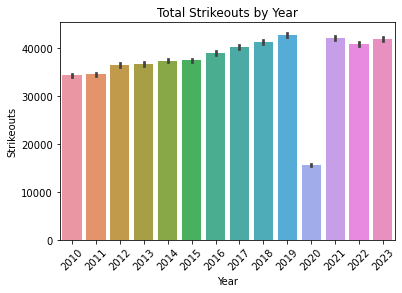

In [77]:
sns.barplot(x='year', y='strikeout', data=combo_df, estimator=sum)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Strikeouts')
plt.title('Total Strikeouts by Year')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

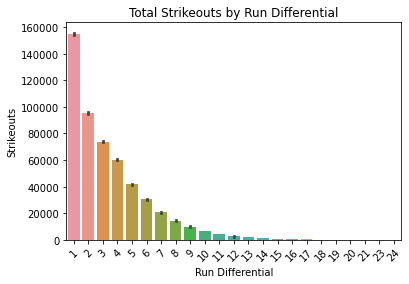

In [78]:
sns.barplot(x='run_differential', y='strikeout', data=combo_df, estimator=sum)

# Add labels and title
plt.xlabel('Run Differential')
plt.ylabel('Strikeouts')
plt.title('Total Strikeouts by Run Differential')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

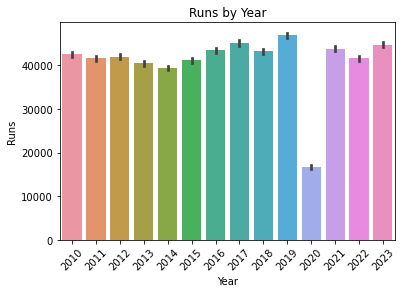

In [79]:
# Runs by Year
sns.barplot(x='year', y='total_runs', data=combo_df, estimator=sum)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Runs')
plt.title('Runs by Year')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

In [80]:
combo_df['total_runs'] = pd.to_numeric(df['total_runs'])
df_sorted = combo_df.sort_values(by='total_runs', ascending=False)

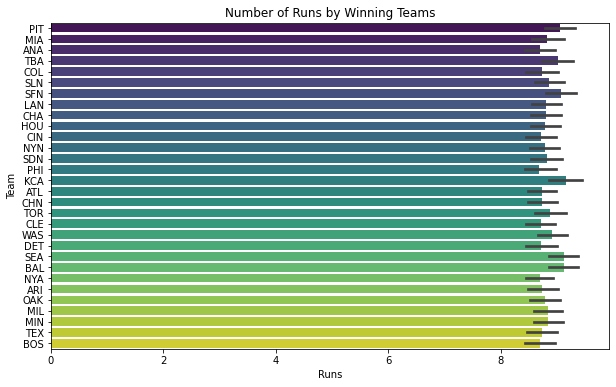

In [81]:
# Sort the DataFrame by total_runs in descending order

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='total_runs', y='winning_team', data=df_sorted, palette='viridis')
plt.xlabel('Runs')
plt.ylabel('Team')
plt.title('Number of Runs by Winning Teams')
plt.show()

In [ ]:
# combo_df.drop(columns=["date", "game_num_visiting", "game_num_home", "line_score_visiting", "line_score_home"], inplace=True)
# consider dropping additional columns
# try to figure out how to move this to the other dropped columns and adjust code as needed

In [ ]:
# Train_Test_Split ####################MUST HAVE THE SAME GAME PAIRS IN TRAIN AND THE THE SAME GAME PAIRS IN TEST; DO NOT SPLIT GAMES BTN THE TWO.
# Preprocessing (standard scale, OHE, simple imputer(?), other)

#X= result['']
#y= df['win']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

#scaler = StandardScaler(
#scaler.fit(X_train)
#X_train_ss = scaler.transform(X_train)
#X_test_ss = scaler.transform(X_test)

In [ ]:

#model_log1 = LogisticRegression(random_state=13)
#model_log1.fit(X_train_ss, y_train)

#### Notes - Working

Consider parsing line score per inning - runs per inning
Some floats should be integers (no decimals needed); consider cleaning up

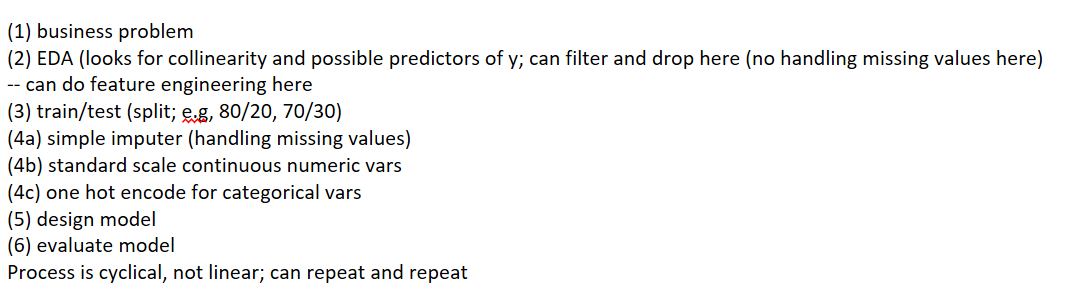


- WAR stat
- Sabermetrics/Billy Beane/defense
- Athletics - move to Vegas?
- How to build a park? How to build a team for your park , e.g. left handed pull hitters for Yankee stadium - have a short right field porch/fence; CO the ball travels further so they have a huge outfield - so need fast players to cover the ground.
- Which parks see the most home runs - holding xyz factors constant
- Mental fortitude as a factor/clutch performance

In [ ]:
from notebook.services.config import ConfigManager

# Get the notebook server's configuration
cm = ConfigManager()

# Update the IOPub data rate limit
cm.update('NotebookApp', {'iopub_data_rate_limit': 2000000})